# 4. Dynamics (Solution)

In this Notebook we will introduce the __dynamic model__, also commonly referred as the __dynamics__. The dynamic model relates the forces/torques applied in the robot's actuators to the joint positions, velocities and accelerations. Similarily to the geometric and kinematic model, there are two kinds of dynamic models:

- __Direct Dynamic Model (DDM)__ : given joint positions $q$, velocities $\dot{q}=\frac{dq}{dt}$ and torques $\tau$, it enables to calculate the resulting joint accelerations $\ddot{q}=\frac{d \dot{q}}{dt}$
- __Inverse Dynamic Model (IDM)__ : given a joint positions $q$, velocities $\dot{q}=\frac{dq}{dt}$ and accelerations $\ddot{q}=\frac{d \dot{q}}{dt}$, it enables to calculate the torques $\tau$

__Note__ : you may want to review [Newton's Laws of Motion](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion) and the notion of [torque](https://www.grc.nasa.gov/WWW/K-12/airplane/torque.html) before starting this Notebook

In [6]:
## This is the implementation of a 1 degree of freedom arm
## Author: Avadesh Meduri
## Date : 21/06/2020

import numpy as np
from matplotlib import pyplot as plt

# these packages for animating the robot env
import IPython
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


In order to execute some desired motion, we need to tell each actuator which contribution it should bring to the general joint space motion. The commands ultimately sent to the robot's actuators are the typically motor currents (eletrical actuation) or pistons fluid pressure (hydraulic actuation). But on a higher level, what causes these motion are forces and torques output by the actuators, regardless of how they internally function. So for now, we will disgard the low-level actuation process and assume "ideal" actuators than generate directly a force or a torque when commanded so.   

Now let us take again the example of the 1R robot. 

__Important note: the angle convention used in the following (i.e. $q$ measured w.r.t. $y$-axis) is different than the one we used in the previous notebooks on modeling (i.e. $q$ measured w.r.t. $x$-axis). The present convention is the most common for analyzing the simple pendulum system__

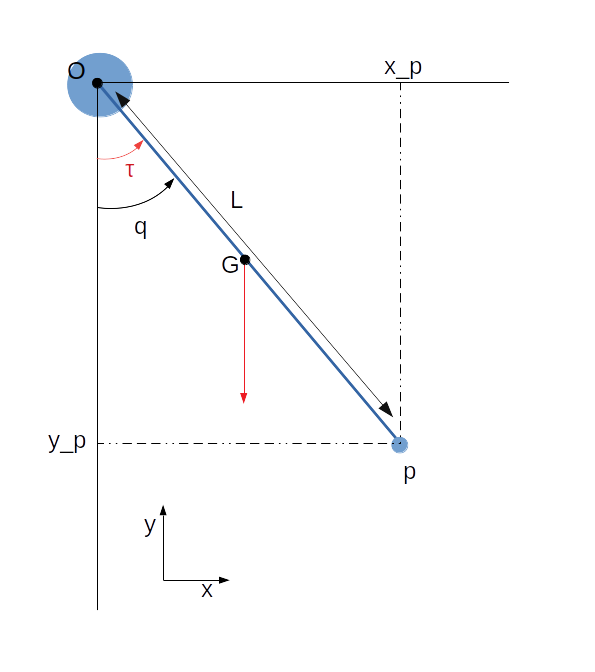

In [7]:
from IPython.display import Image

# Display the 1R robot
Image("1dof-dyn.png")

# Need to change the figure : gravity acts at the tip of the rod (not the middle) + change equations

Neglecting the actuator's dynamics, the rotational joint in $O$ can be viewed as a pure torque source. This torque $\tau$, together with the effect of gravity, generates an angular acceleration $\ddot{q}$. These two quantities satisfy [Euler's law](https://en.wikipedia.org/wiki/Euler%27s_laws_of_motion) :

$$
\tau + \sum \vec{M}_O(\vec{F}) = I \ddot{q}
$$

where 
- $ \sum \vec{M}_O(\vec{F})$ represent the sum of the moments of external forces applied on the robot, taken with respect to the base / origin point $O$
- $I$ is the [inertia](https://en.wikipedia.org/wiki/List_of_moments_of_inertia) of the link (in $kg.m^2.s^2$)

Here the only external force applied on the robot is gravity, acting at the center of mass $G$ and given by $\vec{F}_{gravity} = -mg \vec{y}$ (red arrow in the picture). 

__Question__ : Assuming that $\|\vec{OG}\| = L$, what it the moment due to gravity about $O$ ? 

Hint: Use the definition of the [moment of a force about a point](https://www.miniphysics.com/moment-of-force.html)

__Question__ : Knowing the moment of gravity, how to deduce the DDM / IDM ?


__Question__ : The class below implements the DDM of the 1R robot. Complete the code. Use $I=\frac{1}{3}mL^2$.

In [1]:
class OneDOFManipulator:
    
    def __init__(self, length, mass):
        '''
        This function initialises the class OneDOFManipulatorEnv
        Input:
            length : lenght of the arm
            mass : mass of the rod
        '''
        
        self.length = length
        self.dt = 0.001 # discretization step in seconds
        self.g = 9.81 # gravity vector
        self.m = mass
        # Computing the intertia of the rod about an axis
        # fixed at the end (1/3)ml^2
        # >> Implement here the class attribute for inertia I
        
    def DDM(self, q, v, tau):
        '''
        This function computes the direct dynamics model (DDM) of the manipulator given
        the current state of (Joint Position q, Joint Velocity v) and torque tau
        Input:
            q   : joint position 
            v   : joint velocity
            tau : joint torque
        Output:
            a   : joint acceleration
        '''
        
        # converting q from degree to radians
        # return acceleration
        pass

    def IDM(self, q, v, a):
        '''
        This function computes the inverse dynamics model (IDM) of the manipulator given
        the current state of (Joint Position q, Joint Velocity v) and acceleration a
        Input:
            q : joint position 
            v : joint velocity
            a : joint acceleration
        Output:
            tau : joint torque
        '''
        
        # converting from degree to radians
        # return torque
        pass

The differential equation describing the robot's dynamics derived from the laws of physics is a _continuous-time_ ODE (meaning that $t\in\mathbb{R}$). In order to be able to simulate the system in a program, we need to approximate it by a _discrete-time_ ODE (where $t=1,2,...$). This procedure is called _discretization_ and is crucial to understand how simulations work. Blabla + Euler

In [8]:
class OneDOFManipulator:
    
    def __init__(self, length, mass):
        '''
        This function initialises the class OneDOFManipulatorEnv
        Input:
            length : lenght of the arm
            mass : mass of the rod
        '''
        
        self.length = length
        self.dt = 0.001 # discretization step in seconds
        self.g = 9.81 # gravity vector
        self.m = mass
        # Computing the intertia of the rod about an axis
        # fixed at the end (1/3)ml^2
        self.I = (1/3)*self.m*(self.length**2)
        
    def dynamics(self, theta, theta_dot, torque):
        '''
        This function computes the dynamics (dy/dt = f(y,t)) of the manipulator given
        the current state of (Joint POsition, Joing Velocity)
        Input:
            theta : joint position 
            theta_dot : joint velocity
            torque : torque applied at the end of manipulator
        '''
        
        theta_rad = (np.pi/180)*theta # converting from degree to radians
        return theta_dot, (torque - self.m*self.g*np.sin(theta_rad))/self.I
    
    def integrate_dynamics_euler(self, theta_t, theta_dot_t, torque_t):
        '''
        This function integrates the dynamics of the manipulator for one time step (0.001 sec)
        Input:
            theta_t : joint position at current time
            theta_dot_t : joint velocity at current time
            torque_t : torque applied at the end of manipulator at current time
        '''
        
        joint_velocity, joint_acceleration = self.dynamics(theta_t, theta_dot_t, torque_t)
        
        # integrating using euler integration scheme
        # refer to this link for more details : https://en.wikipedia.org/wiki/Euler_method
        
        theta_t_1 = theta_t + joint_velocity*self.dt
        theta_dot_t_1 = theta_dot_t + joint_acceleration*self.dt
        
        return theta_t_1, theta_dot_t_1
    
    def integrate_dynamics_runga_kutta(self, theta_t, theta_dot_t, torque_t):
        '''
        This function integrates the dynamics of the manipulator for one time step (0.001 sec)
        using runga kutta integration scheme
        Input:
            theta_t : joint position at current time
            theta_dot_t : joint velocity at current time
            torque_t : torque applied at the end of manipulator at current time
        '''
        
        # Runga Kutta is more stable integration scheme as compared to euler
        # refer to this link for more details of runga kutta integration scheme : 
        # https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
        
        k1_thd, k1_thdd  = self.dynamics(theta_t, theta_dot_t, torque_t)
        k2_thd, k2_thdd  = self.dynamics(theta_t + 0.5*self.dt*k1_thd, theta_dot_t + 0.5*self.dt*k1_thdd, torque_t)
        k3_thd, k3_thdd  = self.dynamics(theta_t + 0.5*self.dt*k2_thd, theta_dot_t + 0.5*self.dt*k2_thdd, torque_t)
        k4_thd, k4_thdd  = self.dynamics(theta_t + self.dt*k3_thd, theta_dot_t + self.dt*k3_thdd, torque_t)
        
        theta_t_1 = theta_t + (1/6)*self.dt*(k1_thd + 2*k2_thd + 2*k3_thd + k4_thd)
        theta_dot_t_1 = theta_dot_t + (1/6)*self.dt*(k1_thdd + 2*k2_thdd + 2*k3_thdd + k4_thdd)
        
        return theta_t_1, theta_dot_t_1 
        
    def reset_manipulator(self, initial_theta, initial_theta_dot):
        '''
        This function resets the manipulator to the initial position
        Input:
            initial_theta : starting joint position
            initial_theta_dot : starting joint velocity
        '''
        # creating an array sim_data (simulate data) that stores the joint positions,
        # joint velocities and torques at each time step. Each column corresponds to a the 
        # time step. Row 1 contains joint position, Row 2 contains joint velocity, Row 3 contains
        # torque provided by user at the given time step.
        
        self.sim_data = np.array([[initial_theta], [initial_theta_dot], [0.0]])
        self.t = 0 # time counter in milli seconds
            
    def step_manipulator(self, torque, use_euler = True):
        '''
        This function integrates the manipulator dynamics for one time step
        Input:
            torque : Input torque at the given time step
        '''
        # storing torque provided by user
        self.sim_data[:,self.t][2] = torque
        
        if use_euler:
            
            theta_t = self.sim_data[:,self.t][0]
            theta_dot_t = self.sim_data[:,self.t][1]
            
            theta_t_1, theta_dot_t_1 = self.integrate_dynamics_euler(theta_t, theta_dot_t, torque)
        
        else:
            theta_t = self.sim_data[:,self.t][0]
            theta_dot_t = self.sim_data[:,self.t][1]
            
            theta_t_1, theta_dot_t_1 = self.integrate_dynamics_runga_kutta(theta_t, theta_dot_t, torque)
            
        # keeping theta between (0, 360)
        if theta_t_1 > 360:
            theta_t_1 = theta_t_1%360
        
        # transforming new joint positions and velocity into array form
        sim_data_t_1 = np.array([[theta_t_1], [theta_dot_t_1], [0.0]])
        # adding the data to sim_data
        self.sim_data = np.concatenate((self.sim_data, sim_data_t_1), axis = 1)
        # incrementing time
        self.t += 1
        
    def get_joint_position(self):
        '''
        This function returns the current joint position (degrees) of the mainpulator
        '''
        return self.sim_data[:,self.t][0]
    
    def get_joint_velocity(self):
        '''
        This function returns the current joint velocity (degrees/sec) of the mainpulator
        '''
        return self.sim_data[:,self.t][1]
    
    def animate(self, freq = 100):
        
        sim_data = self.sim_data[:,::freq]

        fig = plt.figure()
        ax = plt.axes(xlim=(-self.length -1, self.length + 1), ylim=(-self.length -1, self.length + 1))
        text_str = "One Dof Manipulator Animation"
        arm, = ax.plot([], [], lw=4)
        base, = ax.plot([], [], 'o', color='black')
        hand, = ax.plot([], [], 'o', color='pink')
        
        def init():
            arm.set_data([], [])
            base.set_data([], [])
            hand.set_data([], [])
            
            return arm, base, hand
        
        def animate(i):
            theta_t = (np.pi/180)*sim_data[:,i][0]
            
            x = self.length*np.sin(theta_t)
            y = -self.length*np.cos(theta_t)
            
            arm.set_data([0,x], [0,y])
            base.set_data([0, 0])
            hand.set_data([x, y])

            return arm, base, hand
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
        ax.grid()
        anim = FuncAnimation(fig, animate, init_func=init,
                                       frames=np.shape(sim_data)[1], interval=25, blit=True)

        plt.close(fig)
        plt.close(anim._fig)
        IPython.display.display_html(IPython.core.display.HTML(anim.to_html5_video()))

    def plot(self):
        '''
        This function plots the joint positions, velocities and torques
        '''
        
        fig, axs = plt.subplots(3,1, figsize = (10, 10))
        axs[0].plot(self.sim_data[0], label = 'joint position')
        axs[0].grid()
        axs[0].legend()
        axs[0].set_ylabel("degrees")

        axs[1].plot(self.sim_data[1], label = 'joint velocity')
        axs[1].grid()
        axs[1].legend()
        axs[1].set_ylabel("degrees/sec")
    
        axs[2].plot(self.sim_data[2,:-1], label = 'torque')
        axs[2].grid()
        axs[2].legend()
        axs[2].set_ylabel("Newton/(Meter Second)")
    
    
        plt.show()

Now the code is tested 

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA/jG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAABcHZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4He8+UME3qAWbm+pnNxrPnjKcHi+CVlu0
gD0OArHBlkiPC0p7SUPKgzPLP+fDqVt6mX395/1S5MCFAAADAqBYqg+/MaUpNfozUbvz//4rONnL
MNhkbA2ZYH6m7Wyg65d90d1Mh1xiuH45ULUU4vivrESWcAgNPH7KScWKb8rN5RSQH/EzL0te9XXO
NdLxmUR06/2kVxy4b4M/QuteZY5QMpKfCDGdCIitN80gdFIZE72x//Tf/5f7IWg/z7FLZrmBOZN0
N1llfV8c3J/6E0LQbRKqR05ifan4qT8LBYR/SjgHLmTS/hk7h0xtxqscEUqeCciuRU8sUETnxrGt
/VdOtO14f4Tr/+geRdmh933ONpK37D7fp1mWnCXqdiinwnzw2nRYE5cSJsBGCRJOdn1qI3KE0yiS
rzxmgT9Lch9FGk8YX2xLdXjRQa1WN8Dqvhqtp+UZ8Ua9TrACfbdceB96nWNhoPwPXL4ZnGV0E51E
RRKRSfYz8sw7SJWeYo4NScbQIHsMsVExiVVfpcrCtI7iQ/0dZ3tvihpGiHOXGRAHGfBRsJgHR7ht
iOiq3OIyR77sw1cibFOuNSuOqkibvHRiuWlBrJOMjlC8n0wyBeQV6T5eTAhhtuWYk+OkCpqSGuj5
hpYkKTDxnxDNJSXT+ZC+FBC3kljUk4u4IERzmhmpIEu/Tsx99SBF+OAjSTq0hqCjDtlXmSfPaORl
v6zkEImm7ZA5WwOT3z5GWZuQy6Fu4kpbsqmLnKG43wVvA7GZiFqU9ODmtdzG42/1emnPUp9ZbA1e
AbM+sG/F050roKNo/XSP0K8naEdMu33y1np7SjAWfcqwW68BvyT65GVZBqMvN2R+J4cYonjp8HYP
k+YxbgIs3yWFm5z4A/q94HcowaV7KLYa4cLM0mVojxx4QDtpruUNWzwcuH1T2tbNXs2Bck2N97TT
J1f9qATWOZqhUyKS428f3t9nEopdm/Wq/x65Igtm8fmc+a8pYnA8yF255H1tLawuHXmEFErLj552
X3/R75JnO+C6l99DdJqCxCH4MqxHD03jdKir37fzqAy3nli6UiVXkcCfVq62oCwtjFK3lhLG93QB
PnSr87vJvad80pb1sdzhLc3ejXgcHz4jeRik/Sun9Qp7LDVmsywwcByQqHupt6XTn2gYB9hriaqZ
8lfx4n577W9gbiUBk0twgyXCOj9SBoSCKlyrDSQSZZqwyw0Ul/G7H+nMgAU46ksGlcVGUfmvZgYL
vbg8aJd47H5Vvqhes/WN4JAuxq3XCByYAq8Ew84HucLwRQGGSj9am/hE9s+Jkj3FgFPRP60CGNYU
YLjVA1v1Pw9kL3s2u5BosoPpGJQMEGQIWv1j072QHH1nnLifxn3AZeV2GWaW1GLB9uccP/UIi8ZD
aUhZdvbYsC317KX34ztDktlg7WRIO17AjWAvVP+hKa3/U1xLOTE0lPYB8n2Nv7vyeGU51d9URFXW
5pZNox5II7P1og/1k4zwNIXk6U/6WARJcui2P2Vci4XaJ5AMw/mxMQlcPB1FEOshHzCdU8hs3kFF
kVepYNg1IV+aJhtrgpxlpxpOj62R82ESz4MIl75yeuI/1YQkrZEtHphzQz+h9AeM74irsL02qfO+
7JTtDE4C1WHJWVB8vxeb6jHCWrjMtPUYdCEudP0k26qiuQYv31cbioqB0vjJFPIu5AihOgrwKOEh
0s8Hz4kJHMkvrK1Gmk0dvjnHaTlq5MOVv4RaUjYkcG1+OjiNrr9VFnXmj1MqzNXXUDD/6DjJEFwX
FcEHzezRiGeIxGmNIccIDVpls2XY87h5lyOgWBgSViN+vz3p6LG7rp8P60yN7nKJDjcXm8GYW81A
0TsvdyLj4fdfZ+pZ1Tzp3TnzcjAATU8GO2IaDjxJOJz4PJkjNyMzn8NDUnq9kwRL3ht1PvY/kHGH
ojdSu0XY6Nzh0IfNx0tW8m/bYiRLtvl9sZs9ug83D7HY2iycTy1qV205ieKuJJq9V7It2oFyDv+G
hlYCbZDRhemU+tGZ7/rX8/N733f1G419RtREpf+5zwUYC0Gu5GjDASHl4kAB2RYg/adXC3UfEPch
05tWLfVeBQmwxWW1HU6A1EOCwGASriAuM8f2gP7Vk4XeqkC3x9nLfUw6UqxSEAEctir6fCbWKWZ9
lvlSClH4qLuDZmRxDylhZwvFSpkUPrzEz+n7Xtww+g14/VBy7Z8gTKeP6LniPFDdKwnOomY5tNRk
NsjS3p7hdfakEp9cU/SmBB6uftMfP/rfh2sQ2gt8sMbeXAGAoySFt5GSDm2gTMyglU6ISxksmky+
/3s0VceAbqxNslCETbB0Rv9v0i+KFjAgQlgqgaC26q3gytXCvvWLYd8AJCP8MUevfX18AZmZz3bT
GEOGCUXGJwS3kE5Y32bDd7rlvWsWgQaz3E1dbImdd2fvfwmohv87GSQRP7sAaH9Oi1tosnHPFVox
VHolcSXDLSf1E8qqWXgr3rqPO08QqkhucrrZvTJeCTh9ZOktukotUQAn30NzR3wnq3mSuCTuwlF+
JTaOO2sAG/qXIs6+jHAul3awzpM4nNyz51/NF5Usa8MXayVvYGcwHIwg7cS+2x0uDTALNMdL6bV5
mWHwE16UUGGCIs4j+Ex6shYcN8HJvas+p6biVg2xXTHyvQaMjTiyX335zMfR3JksXB+LvdVkyv21
qLvgFmA75EgnKEeDn/YaanITUG/3Po7LS5Jx+N/0oe9Pg6w0wolutH/o7bMCByU8CHfK+TlKNYLO
XDEGULiJncbuwlzJ8fx93jDFvlF/vp7H3A0NbxG//zegwBM/GND1soCCy8RTyCq9hBZErERlKpJY
Mg6QU/R8YDhV1MgmRZCXo

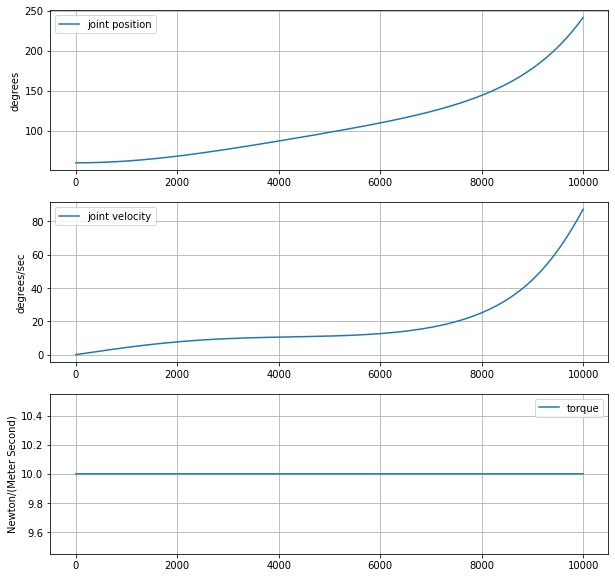

In [12]:
env = OneDOFManipulator(1, 1)
env.reset_manipulator(60,0)
horizon = 10000 # duration of simulation steps

for t in range(horizon):
    torque = 10.
    env.step_manipulator(torque, True)

env.animate()
env.plot()

Now the torque sent to the 1R robot doesn't seem to achieve anything special. What if we want to generate, say, a circle trajectory as we did using the kinematic planner ? Which torque to input ? That's the purpose of the IDM, also referred as __inverse dynamics__. Given a desired motion $q,\dot{q},\ddot{q}$ it returns the torque $\tau$ that must be applied. It corresponds to the equation :

__Question__ : In the environment class, implement an inverse dynamics member function called `inverse_dynamics`

__Question__ : Use the IDM function you implemented, and the simulation environment : 
- Calculate the sequence of torques to achieve a circle with the end-effector (Hint: first, use the `KinematicPlanner` from the previous Notebook to determine the desired $q,\dot{q}$).
- Simulate the sequence of torque, plot it as well as all relevant trajectories (end-effector, joints)

### Possible questions

1. Implement dynamics after reading theory in dynamics method of class
2. implement euler integration scheme (maybe runga kutta also)